<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Prueba Examen Marta Simón
<a class="tocSkip">    
</h1> 

## Carga de las librerías estándar de Data Science con Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set()

# Preguntas del examen
## Preliminares
+ Lee el fichero de datos y crea un data.frame o tibble de R llamado empleados, que usaremos para el resto del examen.

In [2]:
# Leemos el fichero de datos
empleados = pd.read_csv("data/Prueba Examen/empleados.csv")
empleados.head()
#empleados.Department.value_counts()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


# Apartado1
+ **C1¿Cuántas observaciones hay en la tabla? ¿Cuántas variables? ¿Hay datos ausentes? Si la respuesta a la última pregunta es afirmativa, localiza esos datos ausentes indicando en qué filas y columnas se encuentran. Después, antes de seguir adelante, elimina de la tabla las filas que contienen esos datos.**

In [3]:
print(f"El numero de observaciones que hay en la tabla es de (filas, columnas): {empleados.shape}")

El numero de observaciones que hay en la tabla es de (filas, columnas): (3528, 21)


In [4]:
print(f"Las columnas(variables) que componen la tabla son: {empleados.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3528 non-null   int64  
 1   Attrition              3528 non-null   object 
 2   BusinessTravel         3528 non-null   object 
 3   Department             3528 non-null   object 
 4   DistanceFromHome       3519 non-null   float64
 5   Gender                 3528 non-null   object 
 6   JobLevel               3528 non-null   int64  
 7   JobRole                3528 non-null   object 
 8   JobSatisfaction        3528 non-null   object 
 9   MaritalStatus          3528 non-null   object 
 10  MonthlyIncome          3528 non-null   int64  
 11  NumCompaniesWorked     3522 non-null   float64
 12  OverTime               3528 non-null   object 
 13  PerformanceRating      3528 non-null   object 
 14  TotalWorkingYears      3528 non-null   int64  
 15  Trai

En esta tabla, se puede ver que hay variables de varios tipos
+ **int64**: Como la edad o el nivel del trabajo
+ **float64**: Como DistanceFromHome
+ **Object** (factores): Como Education_Field

In [5]:
# Localizamos los datos ausentes
Nan = empleados.isnull().values.any()
print(f"¿Hay algún valor nulo?: {Nan}")

¿Hay algún valor nulo?: True


In [6]:
por_columna=empleados.isna().sum()
print(f"El numero de valores nulos que hay en cada columna es de:\n{por_columna}")

El numero de valores nulos que hay en cada columna es de:
Age                      0
Attrition                0
BusinessTravel           0
Department               0
DistanceFromHome         9
Gender                   0
JobLevel                 0
JobRole                  0
JobSatisfaction          0
MaritalStatus            0
MonthlyIncome            0
NumCompaniesWorked       6
OverTime                 0
PerformanceRating        0
TotalWorkingYears        0
TrainingTimesLastYear    0
YearsAtCompany           0
YearsInCurrentRole       0
RateType                 0
Rate                     0
Education_Field          0
dtype: int64


Podemos ver que hay valores nulos en las columnas de `DistanceFromHome` y `NumCompaniesWorked`.

Localizamos en qué fila se encuentra cada uno de ellos:

In [7]:
Nan_distanceFromHome = empleados.loc[empleados.DistanceFromHome.isna()].index
Nan_NumCompaniesWorked = empleados.loc[empleados.NumCompaniesWorked.isna()].index

print(f"Las filas en las que hay valores nulos para la variable 'DistanceFromHome' son: {Nan_distanceFromHome}")
print(f"Las filas en las que hay valores nulos para la variable 'NumCompaniesWorked' son: {Nan_NumCompaniesWorked}")

Las filas en las que hay valores nulos para la variable 'DistanceFromHome' son: Int64Index([30, 31, 32, 897, 898, 899, 1593, 1594, 1595], dtype='int64')
Las filas en las que hay valores nulos para la variable 'NumCompaniesWorked' son: Int64Index([147, 148, 149, 1092, 1093, 1094], dtype='int64')


In [8]:
# Una vez localizamos los eliminamos
empleados.dropna(inplace=True)
print("Valores nulos eliminados")

Valores nulos eliminados


In [9]:
# Una vez eliminados, podemos comprobar si se ha hecho correctamente
np.any(empleados.isna())

False

 + **C2:
Vamos a fijarnos en las tres últimas columnas de la tabla, que son:**
    ```
    RateType,     Rate,     Education_Field
    ```  

**En particular verás que las columnas `Rate` y `RateType` incumplen una de las condiciones que definen a los conjuntos de datos limpios (*tidy*), porque la columna `Rate` mezcla los valores de más de una variable. La variable correspondiente se indica en la columna `Rate_type`.  Por otro lado, `Education_Field` incumple otra de esas condiciones, porque cada fila de esa tabla combina los valores de dos variable. En este apartado debes limpiar el conjunto de datos utilizando las herramientas del `tidyverse`. Visualiza el resultado usando `select` para que la salida del código muestre exclusivamente las variables que se han modificado en este apartado (¡cuidado, no modifiques los datos al hacer esto!**


**NOTA IMPORTANTE (2022):** este apartado estaba diseñado para usar funciones de la librería `tidyR` de R, que se había practicado en clase. Este curso no hemos visto un análogo en Python y por tanto un apartado como este no aparecería en nuestro examen para este año. Pero por si fuera de interés, incluimos aquí una solución para el apartado usando herramientas de Python. Si no quieres entretetenerte, mira como queda la tabla al final de este apartado y pasa a la siguiente pregunta

In [10]:
# TODO: como extra

+ **C3: Una vez limpios los datos: ¿de qué tipo son las variables del conjunto de datos? Usa la función `mutate_if` de `dplyr` (o alternativamente usa `across`) para asegurarte de que todas las variables de esta tabla que se han leído como `character` se convierten en factores. Mira la ayuda de `mutate_if` para hacer esto si lo necesitas. Después haz una lista de variables cuantitativas y otra de variables cualitativas (factores). ¿Cuáles, dentro de estas últimas, son factores ordenados (no es necesario incluir el orden en el proceso de transformación de estos factores)?**

In [11]:
# Observamos los tipos de las variables
empleados.dtypes

Age                        int64
Attrition                 object
BusinessTravel            object
Department                object
DistanceFromHome         float64
Gender                    object
JobLevel                   int64
JobRole                   object
JobSatisfaction           object
MaritalStatus             object
MonthlyIncome              int64
NumCompaniesWorked       float64
OverTime                  object
PerformanceRating         object
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
RateType                  object
Rate                       int64
Education_Field           object
dtype: object

In [12]:
# Las variables de tipo object son factores
empleados.columns[empleados.dtypes == object]

Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RateType', 'Education_Field'],
      dtype='object')

In [13]:
# el resto de variables son numéricas
empleados.columns[empleados.dtypes != 'object']

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'Rate'],
      dtype='object')

In [14]:
# Para convertir las variables object (facctores) a categóricas, hacemos lo siguiente
empleados_objects = empleados.columns[empleados.dtypes == 'object']
empleados[empleados_objects] = empleados[empleados_objects].astype('category')
# comprobamos que se han convertido a categoría correctamente y buscamos los ordenados
empleados_cat = empleados.columns[empleados.dtypes == 'category']
empleados.loc[:,empleados_cat]
# Los ordenados son JobSatisfaction, Performance Rating y Educational_Field

,Attrition,BusinessTravel,Department,Gender,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RateType,Education_Field
0,No,Travel_Rarely,Research_Development,Male,Healthcare_Representative,Very_High,Married,No,Outstanding,DailyRate,Bachelor//Medical
1,No,Travel_Rarely,Research_Development,Male,Healthcare_Representative,Very_High,Married,No,Outstanding,HourlyRate,Bachelor//Medical
2,No,Travel_Rarely,Research_Development,Male,Healthcare_Representative,Very_High,Married,No,Outstanding,MonthlyRate,Bachelor//Medical
3,Yes,Travel_Frequently,Research_Development,Male,Laboratory_Technician,High,Married,No,Excellent,DailyRate,Bachelor//Medical
4,Yes,Travel_Frequently,Research_Development,Male,Laboratory_Technician,High,Married,No,Excellent,HourlyRate,Bachelor//Medical
...,...,...,...,...,...,...,...,...,...,...,...
3523,No,Travel_Frequently,Sales,Female,Sales_Representative,Very_High,Married,No,Excellent,HourlyRate,College//Medical
3524,No,Travel_Frequently,Sales,Female,Sales_Representative,Very_High,Married,No,Excellent,MonthlyRate,College//Medical
3525,No,Travel_Rarely,Sales,Male,Sales_Executive,High,Married,No,Excellent,DailyRate,Bachelor//Life_Sciences
3526,No,Travel_Rarely,Sales,Male,Sales_Executive,High,Married,No,Excellent,HourlyRate,Bachelor//Life_Sciences


## Apartado 2

+ **C4: Representa gráficamente la distribución de la variable edad `Age` mediante un histograma con la curva de densidad de la variable superpuesta. Recuerda que en este y otros apartados se valorará positivamente el uso de ggplot. Representa también un boxplot de la variable edad. Opcionalmente puedes usar un violinpot o añadir los puntos de la muestra (asegúrate en ese caso de que no impiden ver el boxplot).** 


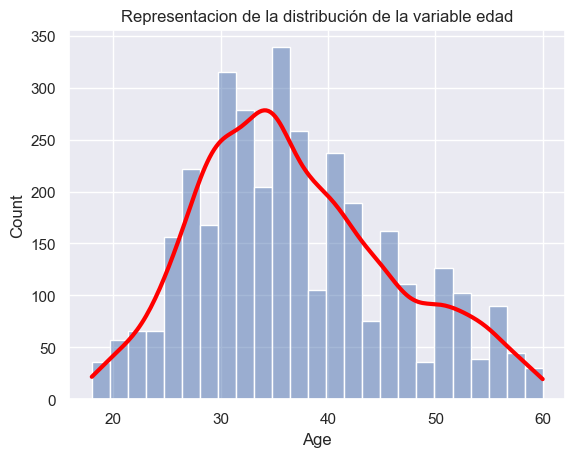

In [15]:
# En primer lugar, representamos el histograma y curva de densidad de la variable edad
# KDE pinta la linea de densidad (sin ello solo pinta el histograma)
# data = Estructura/datos de entrada
# x, y = vectores o claves que especifican los ejes
# stat = density --> para normalizar el eje y, el area total suma 1 (rel_freq)
dens_plot = sns.histplot(data = empleados, x = 'Age', kde=True)#, stat='density')
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = plt.title("Representacion de la distribución de la variable edad")

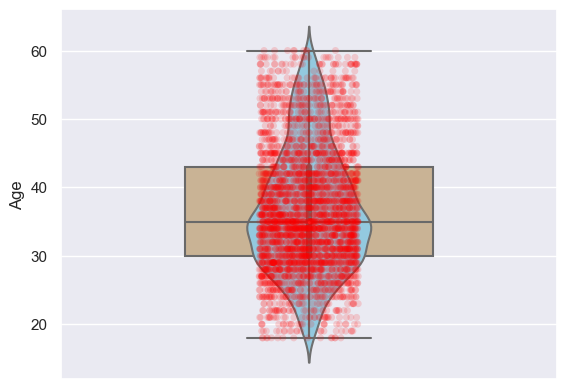

In [16]:
# Vamos a representar un violinplot, y sobre ello un boxplot, pintando tambien un scatterplot de los puntos de la variable,
# para observar mejor su distribucion
sns.violinplot(y= empleados.Age, alpha = 0.3, color = "skyblue", width=0.25)
sns.stripplot(y='Age', data=empleados, color="red", alpha = 0.15, jitter=0.1)
sns.boxplot(y= empleados.Age, width=0.5, color = "tan")
plt.show()

+ **C5: Estudia gráficamente (por ejemplo con boxplots) la relación entre la variable `Age` y la variable `Attrition`. ¿Influye el género en esa relación? Usa los recursos gráficos de ggplot para discutir la respuesta, lo que se busca es un juicio inicial basado en una  exploración gráfica.**

+ El siguiente gráfico de boxplots paralelos por niveles muestra que el valor de `Age` es más bajo entre aquellos empleados para los que `Attrition` es `Yes`. Es decir, que los empleados de menor edad tienen más probabilidad de dejar la compañía. Pero no podemos deducir a partir de este gráfico si esa diferencia de edad entre los dos grupos es significativa.

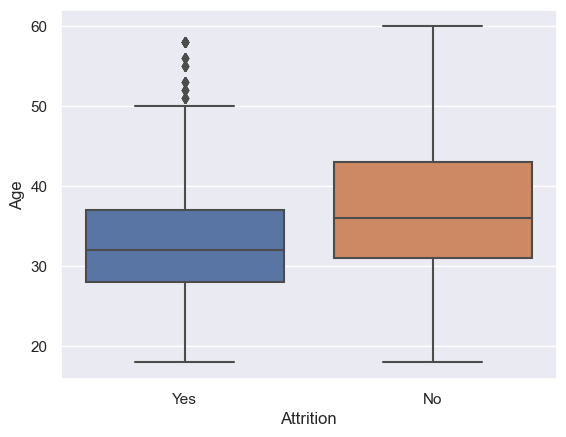

In [17]:
# Vamos a pintar las variables Age y attrition con boxplots
# esta es la lista de clases ordenada
class_order_by_age = list(empleados[['Age', 'Attrition']].groupby('Attrition').median().sort_values('Age').index)

# con el parámetro order podemos especificar el orden en el que queremos pintarlo
sns.boxplot(x='Attrition', y='Age', data=empleados, order=class_order_by_age)
plt.show()

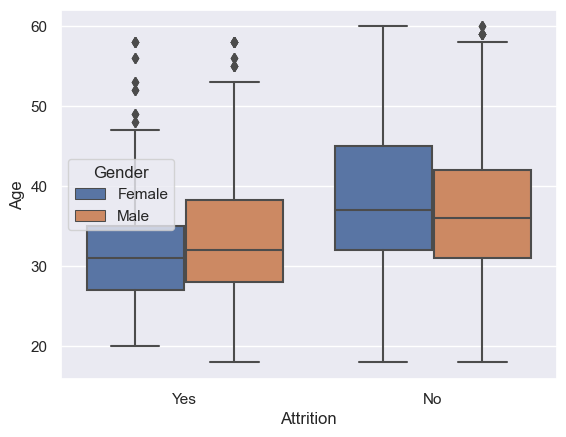

In [18]:
# Ahora vamos a separar cada uno de los plots por género, para ver si influye o no
# esta es la lista de clases ordenada
class_order_by_age = list(empleados[['Age', 'Attrition']].groupby('Attrition').median().sort_values('Age').index)

# con el parámetro order podemos especificar el orden en el que queremos pintarlo
sns.boxplot(x='Attrition', y='Age', data=empleados, hue='Gender', order=class_order_by_age)
plt.show()

+ Para estudiar gráficamente el posible efecto del género en esta relación usamos el argumento `hue`. Los boxplots paralelos en este caso muestran que la diferencia de edad entre los dos grupos es, en el caso de las mujeres, más acusada que en general. 

+ **C6: Haz la tabla de frecuencias absolutas del factor `JobSatisfaction`. Después haz una representación gráfica adecuada de esa tabla. Opcionales:** 
    - **juega con los argumentos `fill` y `position` de `ggplot` para incorporar al gráfico la información de `Attrition` mediante colores.** 
    - **ten en cuenta que `JobSatisfaction` es un factor ordenado y trata de incorporar esa ordenación a la representación gráfica. Indicación: usa la función `factor` y sus argumentos `levels` y `ordered` para esto.**

In [19]:
# tabla de frecuencias absolutas
AbsFreq_JobSatisfaction = empleados.JobSatisfaction.value_counts().sort_index()
AbsFreq_JobSatisfaction

High         1056
Low           693
Medium        657
Very_High    1107
Name: JobSatisfaction, dtype: int64

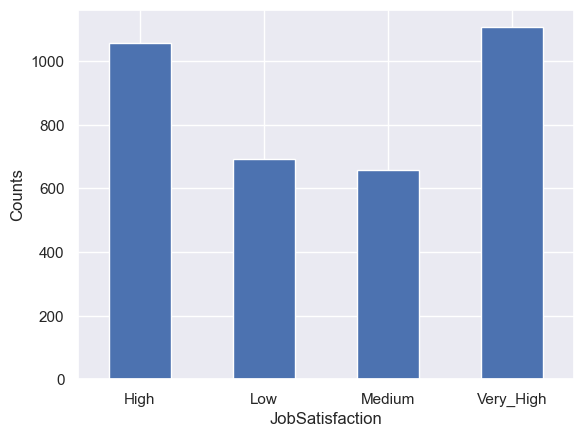

In [20]:
# Para representar gráficamente la tabla de frecuencias usaremos un diagrama de barras
plot = AbsFreq_JobSatisfaction.plot.bar(rot=0, xlabel='JobSatisfaction', ylabel ='Counts')

In [21]:
# Añadimos la informacion de artrition al gráfico apilando la informacion. En primer lugar la ordenamos
# Relacion entre dos factores

CT = pd.crosstab(empleados['JobSatisfaction'], empleados['Attrition'])
CT

Attrition,No,Yes
JobSatisfaction,,
High,891,165
Low,534,159
Medium,555,102
Very_High,990,117


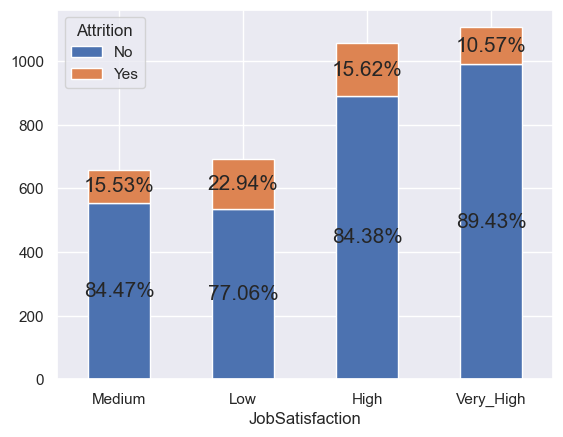

In [22]:
# Calculamos los totales
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
# And plot the bar plot
# Para pintar lo mismo con porcentajes
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)

percents.iloc[:, 0]

ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)


plt.show() 

## Apartado 3

+ **C7: Calcula la mediana del salario mensual para cada departamento y cada nivel dentro de ese departamento. Ordena la respuesta de mayor a menor y asegúrate de que en la tabla de salida se muestran las columnas relevantes.** 

In [23]:
empleados.groupby(['Department', 'JobLevel']).MonthlyIncome.median().sort_values(ascending=False)


Department            JobLevel
Research_Development  5           19326.0
Human_Resources       5           19189.0
Sales                 5           19068.0
Human_Resources       4           16799.0
Research_Development  4           16413.0
Sales                 4           15427.0
Research_Development  3           10293.0
Human_Resources       3            9756.0
Sales                 3            9419.0
Human_Resources       2            5910.0
Sales                 2            5396.0
Research_Development  2            5238.0
Human_Resources       1            2706.0
Research_Development  1            2700.0
Sales                 1            2575.5
Name: MonthlyIncome, dtype: float64

+ **C8: Si elegimos al azar un empleado cuyo nivel de satisfacción en el trabajo `JobSatisfaction` es `VeryHigh`, calcula la probabilidad de que sea soltero. Si elegimos un empleado de la empresa al azar ¿cuál es la probabilidad de que sea una mujer que lleva más de cinco años en la empresa?**

In [24]:
# prob(soltero| jobSatisfaction=Very High)
empleados[empleados.JobSatisfaction == 'Very_High'].MaritalStatus.value_counts(normalize = True)

Married     0.425474
Single      0.355014
Divorced    0.219512
Name: MaritalStatus, dtype: float64

Para ver la probabilidad, normalizamos la tabla de frecuencias para calcular las relativas (probabilidades)
Podemos ver que la prob que buscamos es de **p(Soltero | jobSatisfaction=Very High) = 0.355014**

In [25]:
p = len(empleados[(empleados.Gender == 'Female') & (empleados.YearsAtCompany > 5)])/len(empleados)

print(f"La probabilidad de escoger a una mujer que lleve más de 5 años en la empresa es de {p}")

La probabilidad de escoger a una mujer que lleve más de 5 años en la empresa es de 0.19726729291204098


+ **C9: Si elegimos 12 empleados de esta compañía al azar y con remplezamiento, ¿cuál es la probabilidad
de que 4 de ellos hayan trabajado en 3 o más compañías (NumCompaniesWorked)?**

In [26]:
# Muestreo con remplazamiento (binomial P(X=4)) Tenemos que calcular la media
p_binom = np.mean(empleados['NumCompaniesWorked'] >= 3)
p_binom

0.41417591801878734

In [27]:
# Una vez hecho esto ya podemos calcular la binomial
stats.binom.pmf(4, n = 12, p = p_binom)

0.2020609256259767

 **C10: Haz una tabla de contingencia (dos por dos) de `Attrition` frente a `Overtime`, la variable que nos dice si un empleado hace o no horas extras. Supongamos que queremos usar `Overtime` como una especie de *prueba diagnóstica* de los valores de `Attrition`, equiparando enfermo/sano con `Attrition` Yes/No y test positivo/negativo con `Overtime` Yes/No. ¿Cuál es la tasa de falsos positivos de este test? ¿Cuál es la precisión del test? Opcional: ¿cuáles son su sensibilidad y especificidad?**

In [28]:
CT = pd.crosstab(empleados.Attrition, empleados.OverTime)
CT

OverTime,No,Yes
Attrition,,
No,2295,675
Yes,249,294


Esto es como una matriz de confusión, podemos asociarlo con esto:
<table>
<tbody>
<tr class="odd">
<td style="text-align: left;"></td>
<td style="text-align: left;"></td>
<td colspan="3" style="text-align: center;"><u><strong>Real state of the patient</strong></u></td>
</tr>
<tr class="even">
<td style="text-align: left;"></td>
<td style="text-align: left;"></td>
<td style="text-align: center;"><strong>Positive (condition present)</strong></td>
<td style="text-align: center;"><strong>Negative (condition absent)</strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><u><strong>Test Result</strong></u></td>
<td style="text-align: left;"> <strong>Positive </strong></td>
<td style="text-align: center;">TP = True Positive</td>
<td style="text-align: center;">FP = False Positive</td>
</tr>
<tr class="even">
<td style="text-align: left;"></td>
<td style="text-align: left;"> <strong>Negative </strong></td>
<td style="text-align: center;">FN = False Negative</td>
<td style="text-align: center;">TN = True Negative</td>
</tr>
</tbody>
</table>  


In [29]:
# La pasamos a numpy para hacer mejor los cálculos
CT_np = CT.to_numpy()
CT_np

array([[2295,  675],
       [ 249,  294]], dtype=int64)

In [30]:
# Tasa de falsos positivos. Se puede calcular también sobre el total
CT_np[0,1]/sum(CT_np[0])

0.22727272727272727

In [31]:
# Precision del test: Sumamos la diagonal y dividimos entre el total
precission = np.diagonal(CT_np).sum()/CT_np.sum()
precission

0.7369769427839453

+ **C11: Asumiendo la normalidad de los datos, calcula un intervalo de confianza al 95% para la edad media de los empleados del departamento más numeroso de la empresa. Opcional: ¿crees que está justificada la hipótesis de normalidad de esos datos?**

In [32]:
# En primer lugar, vamos a buscar el departamento más numeroso
empleados.Department.value_counts().sort_values()
empleados.Department.value_counts()['Research_Development']
# Vemos que el mas numeroso es Research_Development, así que vamos a calcular el intervalo de conf para este departamento

2313

In [33]:
# Calculamos los valores necesarios
n = empleados.Department.value_counts()['Research_Development']
print("El numero de empleados de la muestra es de:" ,n)
barX = empleados[empleados.Department == "Research_Development"].Age.mean()
print("La media muestral es de: ", barX)
s = empleados[empleados.Department == "Research_Development"].Age.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de empleados de la muestra es de: 2313
La media muestral es de:  37.06874189364462
La varianza es de:  9.100459845194237
El intervalo de confianza es  [36.69787026 37.43961352]
Redondeamos a 4 digitos: [36.7, 37.44]


<function matplotlib.pyplot.show(close=None, block=None)>

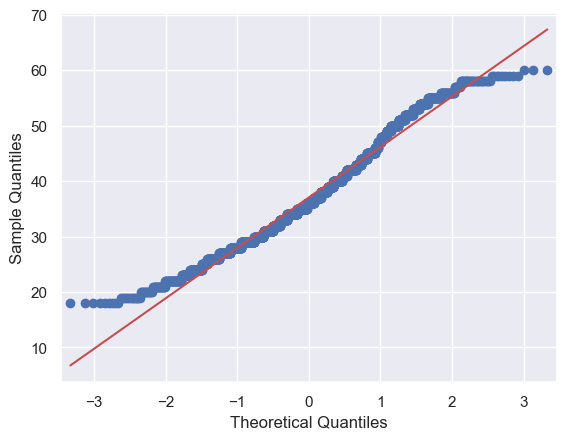

In [34]:
# Para verificar la normalizdad de la muestra, hacemos un qqplot para ver si se acercan los datos a la normal
sm.qqplot(empleados[empleados.Department == "Research_Development"].Age, line="s")
plt.show

Podemos ver que, para la muestra, la variable se aleja bastante de la normal, por lo que nos lleva a rechazar la hipotesis nula y y confirmar las sospechas de que la normalidad de la muestra no está garantizada. 

+ **C12: Toma una muestra aleatoria y con remplazamiento de 20 empleados del departamento de ventas y haz un contraste (al 95% de significación) de la *hipótesis nula:* la distancia media a su domicilio es de 9 km. Asegúrate de mantener el comando `set.seed` como primera línea de tu respuesta en este apartado para garantizar la reproducibilidad.**

In [35]:
np.random.seed(2022)
# Tamaño de la muestra
n =20
data = empleados[(empleados.Department == 'Sales')].sample(n)

# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(data.DistanceFromHome, 
                                   popmean=9, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="two-sided") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(data.DistanceFromHome.size))
print("The sample mean is {:.4}".format(data.DistanceFromHome.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))


The sample size is  20
The sample mean is 7.7
The T score is -0.8061
And the corresponding p-value is 0.4301


+ El p-valor es muy grande, asi que **no** rechazamos la hipótesis nula. 

+ **C13:  Considerando los empleados del departamento *Research_Development* vamos a hacer un modelo de regresión lineal para las dos variables:  
$x:$ YearsAtCompany
$y:$ MonthlyIncome  
Construye el modelo usando la función `lm` y además dibuja el diagrama de dispersión de esas variables junto con la recta de regresión obtenida. ¿Qué porcentaje de la variabilidad en el salario mensual se explica con el modelo? ¿Cuánto se incrementa el salario mensual de un empleado de ese departamento por cada año de antigüedad en la empresa?**

In [45]:
# Empleados del departamento reaserch development
RD = empleados.loc[empleados.Department == 'Research_Development']
X = sm.add_constant(RD.YearsAtCompany) # para añadir una constante en la matriz para que a la hora de multiplicar no se modifique.
Y = RD.MonthlyIncome
model_RD = sm.OLS(Y, X) # OLS comes from Ordinary Least Squares, minimizamos las medias (areas de los cuadrados)
RD_fit = model_RD.fit()
RD_fit.summary()

      const  YearsAtCompany
0       1.0               9
1       1.0               9
2       1.0               9
3       1.0               2
4       1.0               2
...     ...             ...
3517    1.0               2
3518    1.0               2
3519    1.0               5
3520    1.0               5
3521    1.0               5

[2313 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     717.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          6.64e-138
Time:                        09:34:23   Log-Likelihood:                -22599.
No. Observations:                2313   AIC:                         4.520e+04
Df Residuals:                    2311   BIC:                         4.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3599.4544    133.251     27.012      0.000    3338.149    3860.759
YearsAtCompany   386.9214     14.443     26.789      0.000     358.598     415.245
==============================================================================
Omnibus:                      597.690   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.378
Skew:                           1.482   Prob(JB):                    1.04e-280
Kurtosis:                       5.142   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# El porcentaje de variabilidad es de (Pearson)
RD_fit.rsquared

0.23694971973611867

Como podemos ver, la variabilidad del modelo se acerca bastante a 0, por lo que podemos saber que el ajuste de los datos por parte del modelo es ciertamente malo.


In [38]:
# el incremento del salario por año de antiguedad lo podemos obtener de los coeficientes de la recta, en concreto, la constante
RD_fit.params[1]

386.9213938232262

[[ 1.          0.        ]
 [ 1.          0.4040404 ]
 [ 1.          0.80808081]
 [ 1.          1.21212121]
 [ 1.          1.61616162]
 [ 1.          2.02020202]
 [ 1.          2.42424242]
 [ 1.          2.82828283]
 [ 1.          3.23232323]
 [ 1.          3.63636364]
 [ 1.          4.04040404]
 [ 1.          4.44444444]
 [ 1.          4.84848485]
 [ 1.          5.25252525]
 [ 1.          5.65656566]
 [ 1.          6.06060606]
 [ 1.          6.46464646]
 [ 1.          6.86868687]
 [ 1.          7.27272727]
 [ 1.          7.67676768]
 [ 1.          8.08080808]
 [ 1.          8.48484848]
 [ 1.          8.88888889]
 [ 1.          9.29292929]
 [ 1.          9.6969697 ]
 [ 1.         10.1010101 ]
 [ 1.         10.50505051]
 [ 1.         10.90909091]
 [ 1.         11.31313131]
 [ 1.         11.71717172]
 [ 1.         12.12121212]
 [ 1.         12.52525253]
 [ 1.         12.92929293]
 [ 1.         13.33333333]
 [ 1.         13.73737374]
 [ 1.         14.14141414]
 [ 1.         14.54545455]
 

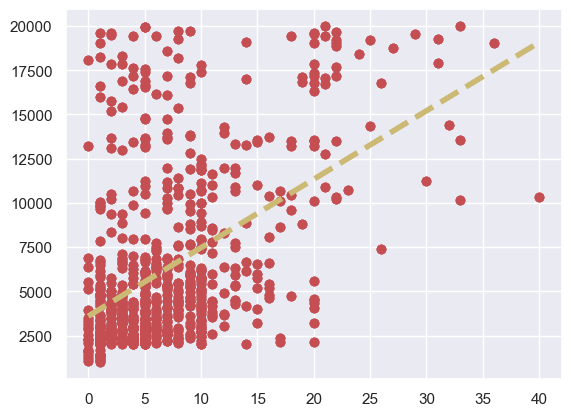

In [47]:
# Dibujamos el diagrama de dispersión
# The linspace funtion generates the grid
# linespace es como un rango, le das el minimo y el máximo y el numero de trozos en los que quieres dividir.
X_new = np.linspace(X.min(), X.max(), num = 100) # pinta los puntos rojos.
print(X_new)
# Predict the corresponding Y-values
Y_new = RD_fit.predict(X_new)

#Plot the sample
plt.plot(X.iloc[:,1], Y, 'ro') # pinta la muestra
# And the regression line = "predicted points"
plt.plot(X_new[:,1], Y_new, "y--", lw = 4)
plt.show()